# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain yourself the purposes of the project and actions you plan to take.]

[Please bear in mind that studying, amending and analyzing data is an iterative process. It is normal to return back to previous steps and correct/expand them to allow for further steps.]

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt



### Load data

In [2]:
# Load the data file into a DataFrame

data = pd.read_csv('/datasets/vehicles_us.csv')

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

[Understanding the fields, explore them to make yourself familiar with the data.]

In [3]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# print a sample of data

data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


There are missing values that need to be addressed. Especially in the 'is_4wd' column, I think because it's a boolean value then everything that appears as a missing value is a False and everything that is True appears as 1.

Yes. Column 'model_year' is displayed decimal, which is not suitable for counting years.

At this point I am going to replace the missing values in column 'is_4wd' with 0, and I am going to make column 'model_year' an integer.

In [5]:
data.duplicated().sum()

0

There is no duplicates in the data.

## Treat missing values (if any)

In [6]:
data.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [7]:
data.isnull().sum() / (len(data))*100 / 13

price           0.000000
model_year      0.540290
model           0.000000
condition       0.000000
cylinders       0.785280
fuel            0.000000
odometer        1.178218
transmission    0.000000
type            0.000000
paint_color     1.383496
is_4wd          3.874594
date_posted     0.000000
days_listed     0.000000
dtype: float64

As you can see most of the missing values are from 'is_4wd' column and I will replace them. I will delete the rest of the missing values.
The percentage of missing values in our data is 7.74%.

The percentage of missing values removed from the data is 3.87%.

In [8]:
data['is_4wd']= data['is_4wd'].fillna(0)

In [9]:
data['is_4wd'].isnull().sum()

0

In [10]:
data.dropna(inplace=True)

In [11]:
data.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

## Fix data types

In [12]:
data['model_year']=data['model_year'].astype(int)

In [13]:
data['model_year'].value_counts()

2013    2173
2012    2162
2011    2135
2014    2134
2015    2058
        ... 
1976       1
1961       1
1963       1
1948       1
1936       1
Name: model_year, Length: 65, dtype: int64

In [14]:
data.drop(data[data['model_year']<=1950].index, inplace=True)

In [15]:
data['model_year'].value_counts()

2013    2173
2012    2162
2011    2135
2014    2134
2015    2058
        ... 
1958       1
1955       1
1961       1
1976       1
1963       1
Name: model_year, Length: 62, dtype: int64

I changed the 'model_year' column to integers, and I removed entries whose model year was radically old..now our data is ready to use.

## Enrich data

In [16]:
# Add datetime values for when the ad was placed
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%dT%H:%M:%S')
data['weekday']= data['date_posted'].dt.weekday

In [17]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1
5,14990,2014,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,2
6,12990,2015,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,3
7,15990,2013,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,0


In [18]:
# Add the vehicle's age when the ad was placed
date1 = dt.date.today()
data['car_age']= date1.year - data['model_year']

In [19]:
data['car_age'].value_counts()

9     2173
10    2162
11    2135
8     2134
7     2058
      ... 
61       1
46       1
64       1
67       1
59       1
Name: car_age, Length: 62, dtype: int64

In [20]:
# Add the vehicle's average mileage per year

data['avg_mil'] = data['odometer'] /data['car_age']

In [21]:
data['avg_mil'].value_counts()

10000.000000    158
0.000000        128
11000.000000    104
9000.000000      96
8000.000000      88
               ... 
9494.200000       1
13658.444444      1
8934.888889       1
9824.300000       1
9216.000000       1
Name: avg_mil, Length: 16135, dtype: int64

In [22]:
# It might help to replace the condition values with something that can be manipulated more easily


data.replace(['new', 'like new', 'excellent', 'good', 'fair', 'salvage'], [5, 4, 3, 2, 1, 0], inplace=True)

In [23]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,car_age,avg_mil
2,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,9,12222.222222
4,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,5,16180.600000
5,14990,2014,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,2,8,7244.250000
6,12990,2015,toyota camry,3,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,3,7,11316.000000
7,15990,2013,honda pilot,3,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,0,9,12163.666667


In [24]:
data['model'].value_counts()

ford f-150                  1654
chevrolet silverado 1500    1257
ram 1500                    1012
chevrolet silverado          745
jeep wrangler                628
                            ... 
kia sorento                  141
chrysler 200                 138
ford f-250 super duty        129
acura tl                     128
nissan murano                124
Name: model, Length: 99, dtype: int64

At this stage we do:
1. I changed the 'date_posted' format and added a column for the day of the week in which the post was published.
2. I added a column of the average mileage of the car per year.
3. I changed the strings in the 'condition' column to numeric values to make it more convenient to work with.

## Check clean data

In [25]:
# print the geneal/summary information about the DataFrame

data.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,weekday,car_age,avg_mil
count,29913.000000,29913.000000,29913.000000,29913.000000,29913.000000,29913.000000,29913.000000,29913.000000,29913.000000,29913.000000
mean,12197.141845,2009.754488,2.638251,6.134223,115463.545148,0.496507,39.637148,2.992278,12.245512,9903.335589
std,10152.867530,6.222261,0.713426,1.659261,65296.783265,0.499996,28.107406,1.997585,6.222261,4943.445978
min,1.000000,1955.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,5000.000000,2006.000000,2.000000,4.000000,69854.000000,0.000000,19.000000,1.000000,8.000000,6937.333333
50%,9000.000000,2011.000000,3.000000,6.000000,113000.000000,0.000000,33.000000,3.000000,11.000000,9623.000000
75%,16900.000000,2014.000000,3.000000,8.000000,155113.000000,1.000000,53.000000,5.000000,16.000000,12461.538462
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,1.000000,267.000000,6.000000,67.000000,119727.857143


## Study core parameters

[Choose an appropriate approach to study the parameters listed below, pay special attention to how outliers affect the form and readability of the histograms.]

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

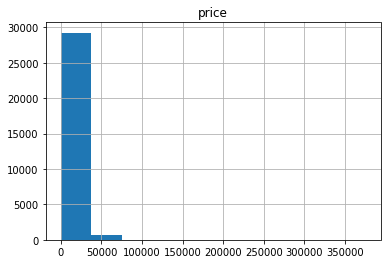

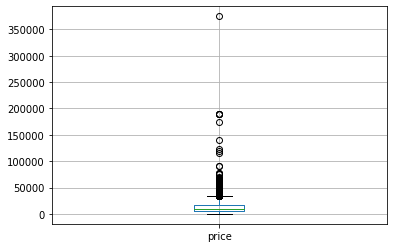

count     29913.000000
mean      12197.141845
std       10152.867530
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16900.000000
max      375000.000000
Name: price, dtype: float64


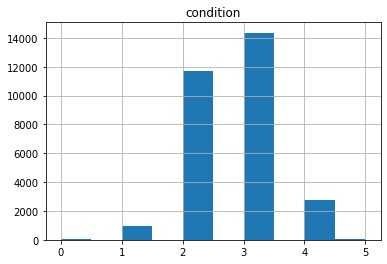

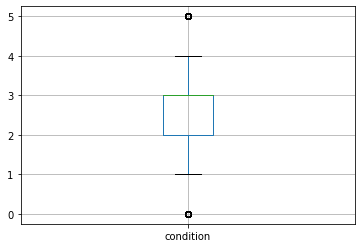

count    29913.000000
mean         2.638251
std          0.713426
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64


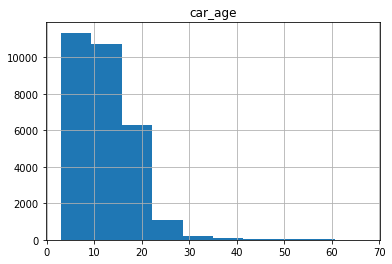

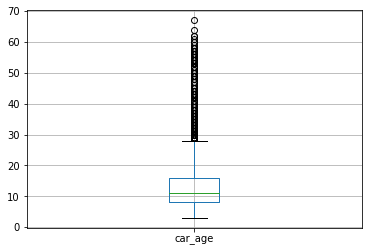

count    29913.000000
mean        12.245512
std          6.222261
min          3.000000
25%          8.000000
50%         11.000000
75%         16.000000
max         67.000000
Name: car_age, dtype: float64


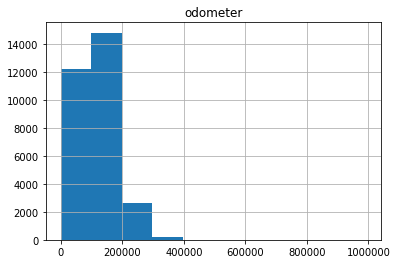

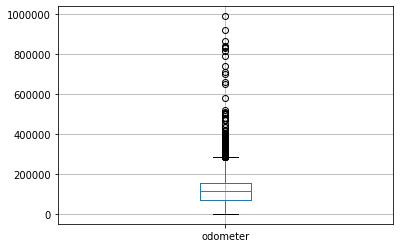

count     29913.000000
mean     115463.545148
std       65296.783265
min           0.000000
25%       69854.000000
50%      113000.000000
75%      155113.000000
max      990000.000000
Name: odometer, dtype: float64


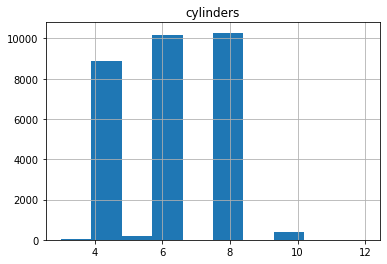

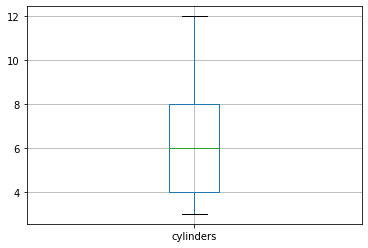

count    29913.000000
mean         6.134223
std          1.659261
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64


In [26]:
old_data = pd.DataFrame(data, columns = ['price', 'condition', 'car_age', 'odometer', 'cylinders'])
for i in old_data:
    data.hist(i)
    plt.show()
    data.boxplot(i)
    plt.show()
    print(data[i].describe())

price:

In the price histogram we can see that the vast majority of cars range from  0-  50000, with some
Small of cars ranging from $50,000 - $100,000. The graph continues up to a range of 400000 , indicating exceptions that ruin our graph.
In Plotbox we can see the same exceptions, when the normal price range is around 0 to 40,000. You can also see the distribution of the exceptions.

Condition:

In the histogram of the condition we can see that the condition of most cars ranges from 1 ('f'air) to 4 (' like new '), and there is a small section with the values 0 (' salvage ') and 5 (' new ').
In Plotbox we really see that 0 and 5 are exceptions.

Car age:

In the vehicle age histogram we see that the age of most vehicles ranges from two years to 15 years. A smaller but significant portion ranges from 15 years to 22 years and a very small portion ranges from 22 years to 42 years.
If so we see that our graph is stretched up to 70 years, which tells us that there are few values ​​in these years.
In Plotbox we see that the normal age range is between two and 28 years, and as we suspected there are some exceptions in the range of 28 years to 70 years.

Odometer:

In the mileage histogram we see that we have a little over 12,000 vehicles whose mileage ranges from 0 to 15,000 and in the region of 15,000 vehicles whose mileage ranges from 15,000 to 20,000 (most cars are in both of these ranges).
In the mileage histogram we see that we have a little over 12,000 vehicles whose mileage ranges from 0 to 15,000 and in the region of 15,000 vehicles whose mileage ranges from 15,000 to 20,000 (most cars are in both of these ranges).
In addition we have around 3,000 vehicles with mileage ranging from 20,000 to 30,000 and a few hundred cars whose range ranges from 30,000 to 40,000.
If this the mileage axis continues up to 1,000,000, which indicates to us exceptions.
In the PlotBox we can see that the normal mileage ranges from 0 to about 250,000.
There are many exceptions from the 250,000 to 600,000 range and some extreme exceptions that continue up to the 1,000,000 range.

cylinders:

In the cylinder column we can see that the distribution ranges from 3-12 cylinders with the absolute majority being in the range of 4-8 cylinders. If so we see in the plotbox that we have no anomalies in the distribution and therefore the values ​​between 0-4 and 8-12 are also normal.

I used boxplot for all the columns indicated to check for outliers graphically and used describe to check for exceptions numerically.
outliers were found in all columns except the cylinder column, and should be removed as they impair the quality of the graph..


## Study and treat outliers

[Given the results above, determine what columns may contain outliers, and create a DataFrame without those outliers. Hint: Outliers can be identified by defining the lower/upper limits for normal range of values.]

In [27]:
# Determine the lower limits for outliers
outlin_column = ['car_age', 'price', 'odometer', 'condition']
for i in outlin_column:
    Q1=data[i].quantile(0.25)
    Q3=data[i].quantile(0.75)
    IQR = Q3 - Q1
    iqr_min = Q1-1.5*IQR
    print(iqr_min)

-4.0
-12850.0
-58034.5
0.5


In [28]:
# Determine the upper limits for outliers
for i in outlin_column:
    Q1=data[i].quantile(0.25)
    Q3=data[i].quantile(0.75)
    IQR = Q3 - Q1
    iqr_max = Q3+ 1.5*IQR
    print(iqr_max)

28.0
34750.0
283001.5
4.5


In [29]:
# Store data without outliers in a separate DataFrame

data_cln = data.query('car_age < 28 and price < 34750 and price > 12850 and odometer < 283028 and odometer > 58034 and condition < 4.5 and condition > 0.5')
data_cln['price'].describe()

count     6667.000000
mean     18988.161842
std       5121.716164
min      12856.000000
25%      14950.000000
50%      17500.000000
75%      22000.000000
max      34700.000000
Name: price, dtype: float64

According to the IQR formula I calculated the upper and lower limits and then filtered the data according to the results I got (regarding the lower limits only car_age came out useful as all the other values came out negative).

## Study core parameters without outliers

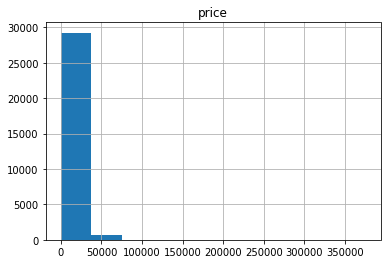

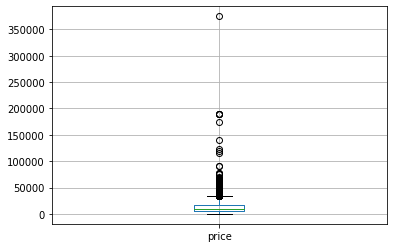

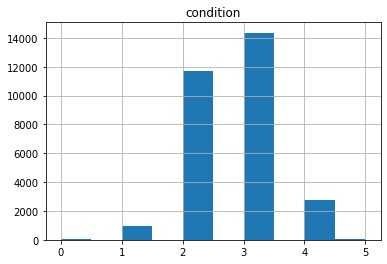

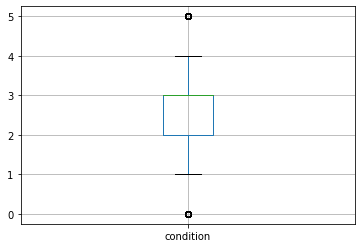

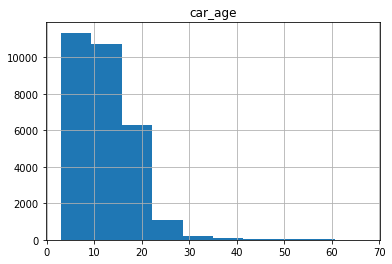

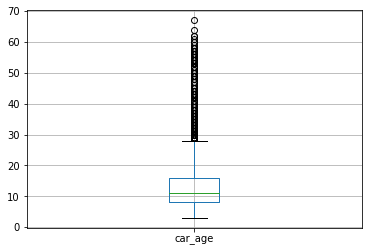

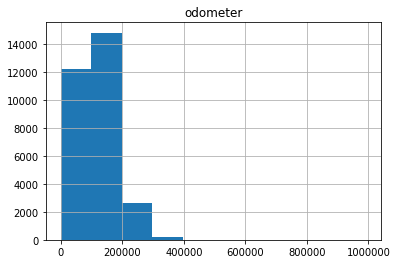

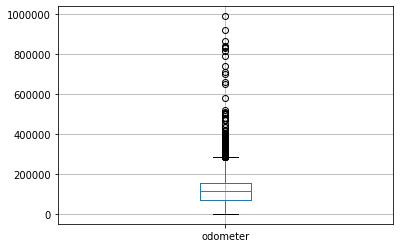

In [30]:
old_data = pd.DataFrame(data, columns = ['price', 'condition', 'car_age', 'odometer'])
for i in old_data:
    data.hist(i)
    plt.show()
    data.boxplot(i)
    plt.show()

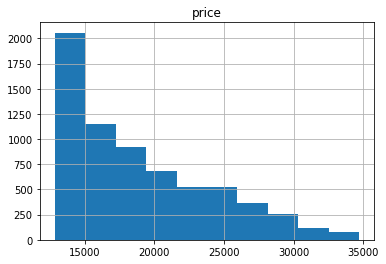

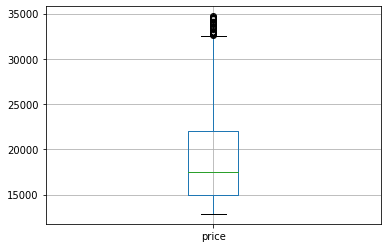

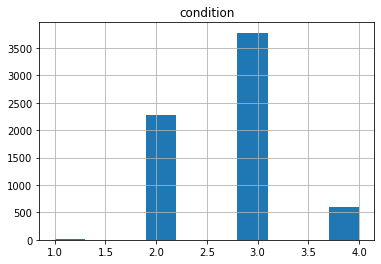

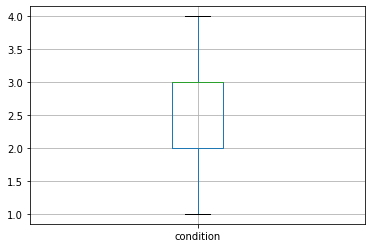

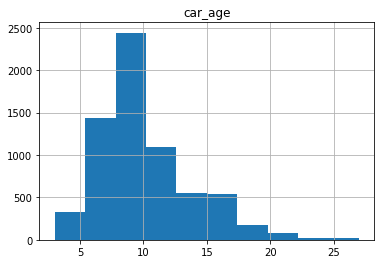

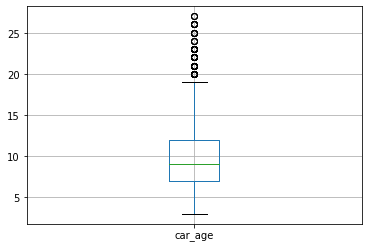

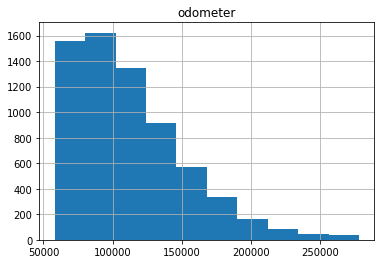

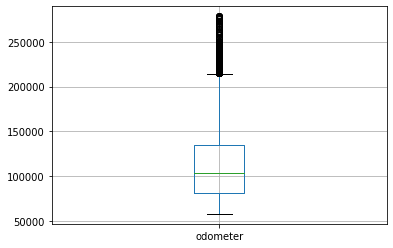

In [31]:
data_clen_a = pd.DataFrame(data_cln, columns = ['price', 'condition', 'car_age', 'odometer']) 
for i in data_clen_a:
    data_cln.hist(i)
    plt.show()
    data_cln.boxplot(i)
    plt.show()

Conclusions:

1.In the age column of the cars the graph became much more readable after we removed the exceptions and as a result the X-axis was not stretched to illogical numbers and it is possible to understand what is happening in the table.

2.The condition column had the least major change since we are dealing with small numbers as well.

3.In the price column the change was the biggest because there was a really extreme exception that stretched the X-axis and distorted the whole table, and now you can see the real price distribution.

4.In column odometer there was something similar to the price column with an extreme exception that distorted the whole table.

Ads liftime:

In [32]:
data['days_listed'].describe()


count    29913.000000
mean        39.637148
std         28.107406
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        267.000000
Name: days_listed, dtype: float64

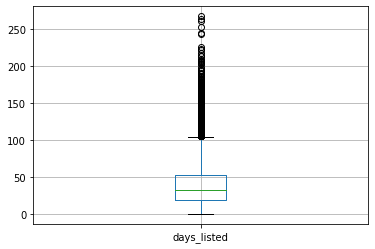

In [33]:
data.boxplot('days_listed');
plt.show()

I see there are exceptions in the column e so to find out when the ads were quickly removed and when they stayed too long I will look for its upper and lower limits.

In [34]:
Q1=data['days_listed'].quantile(0.25)
Q3=data['days_listed'].quantile(0.75)
IQR = Q3 - Q1
iqr_min = Q1- 1.5*IQR
iqr_max = Q3+ 1.5*IQR
print(iqr_min)
print(iqr_max)

-32.0
104.0


Average ad life time: 33 days.
(I used the median we found because it will be more accurate this time than average)
when ads were removed quickly: 0 days (same day).
(The values I got at the lower limit are negative and it does not make sense so it will be 0.)
when ads listed for an abnormally long time: 104 days.

## Average price per each type of vehicle

[Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.]

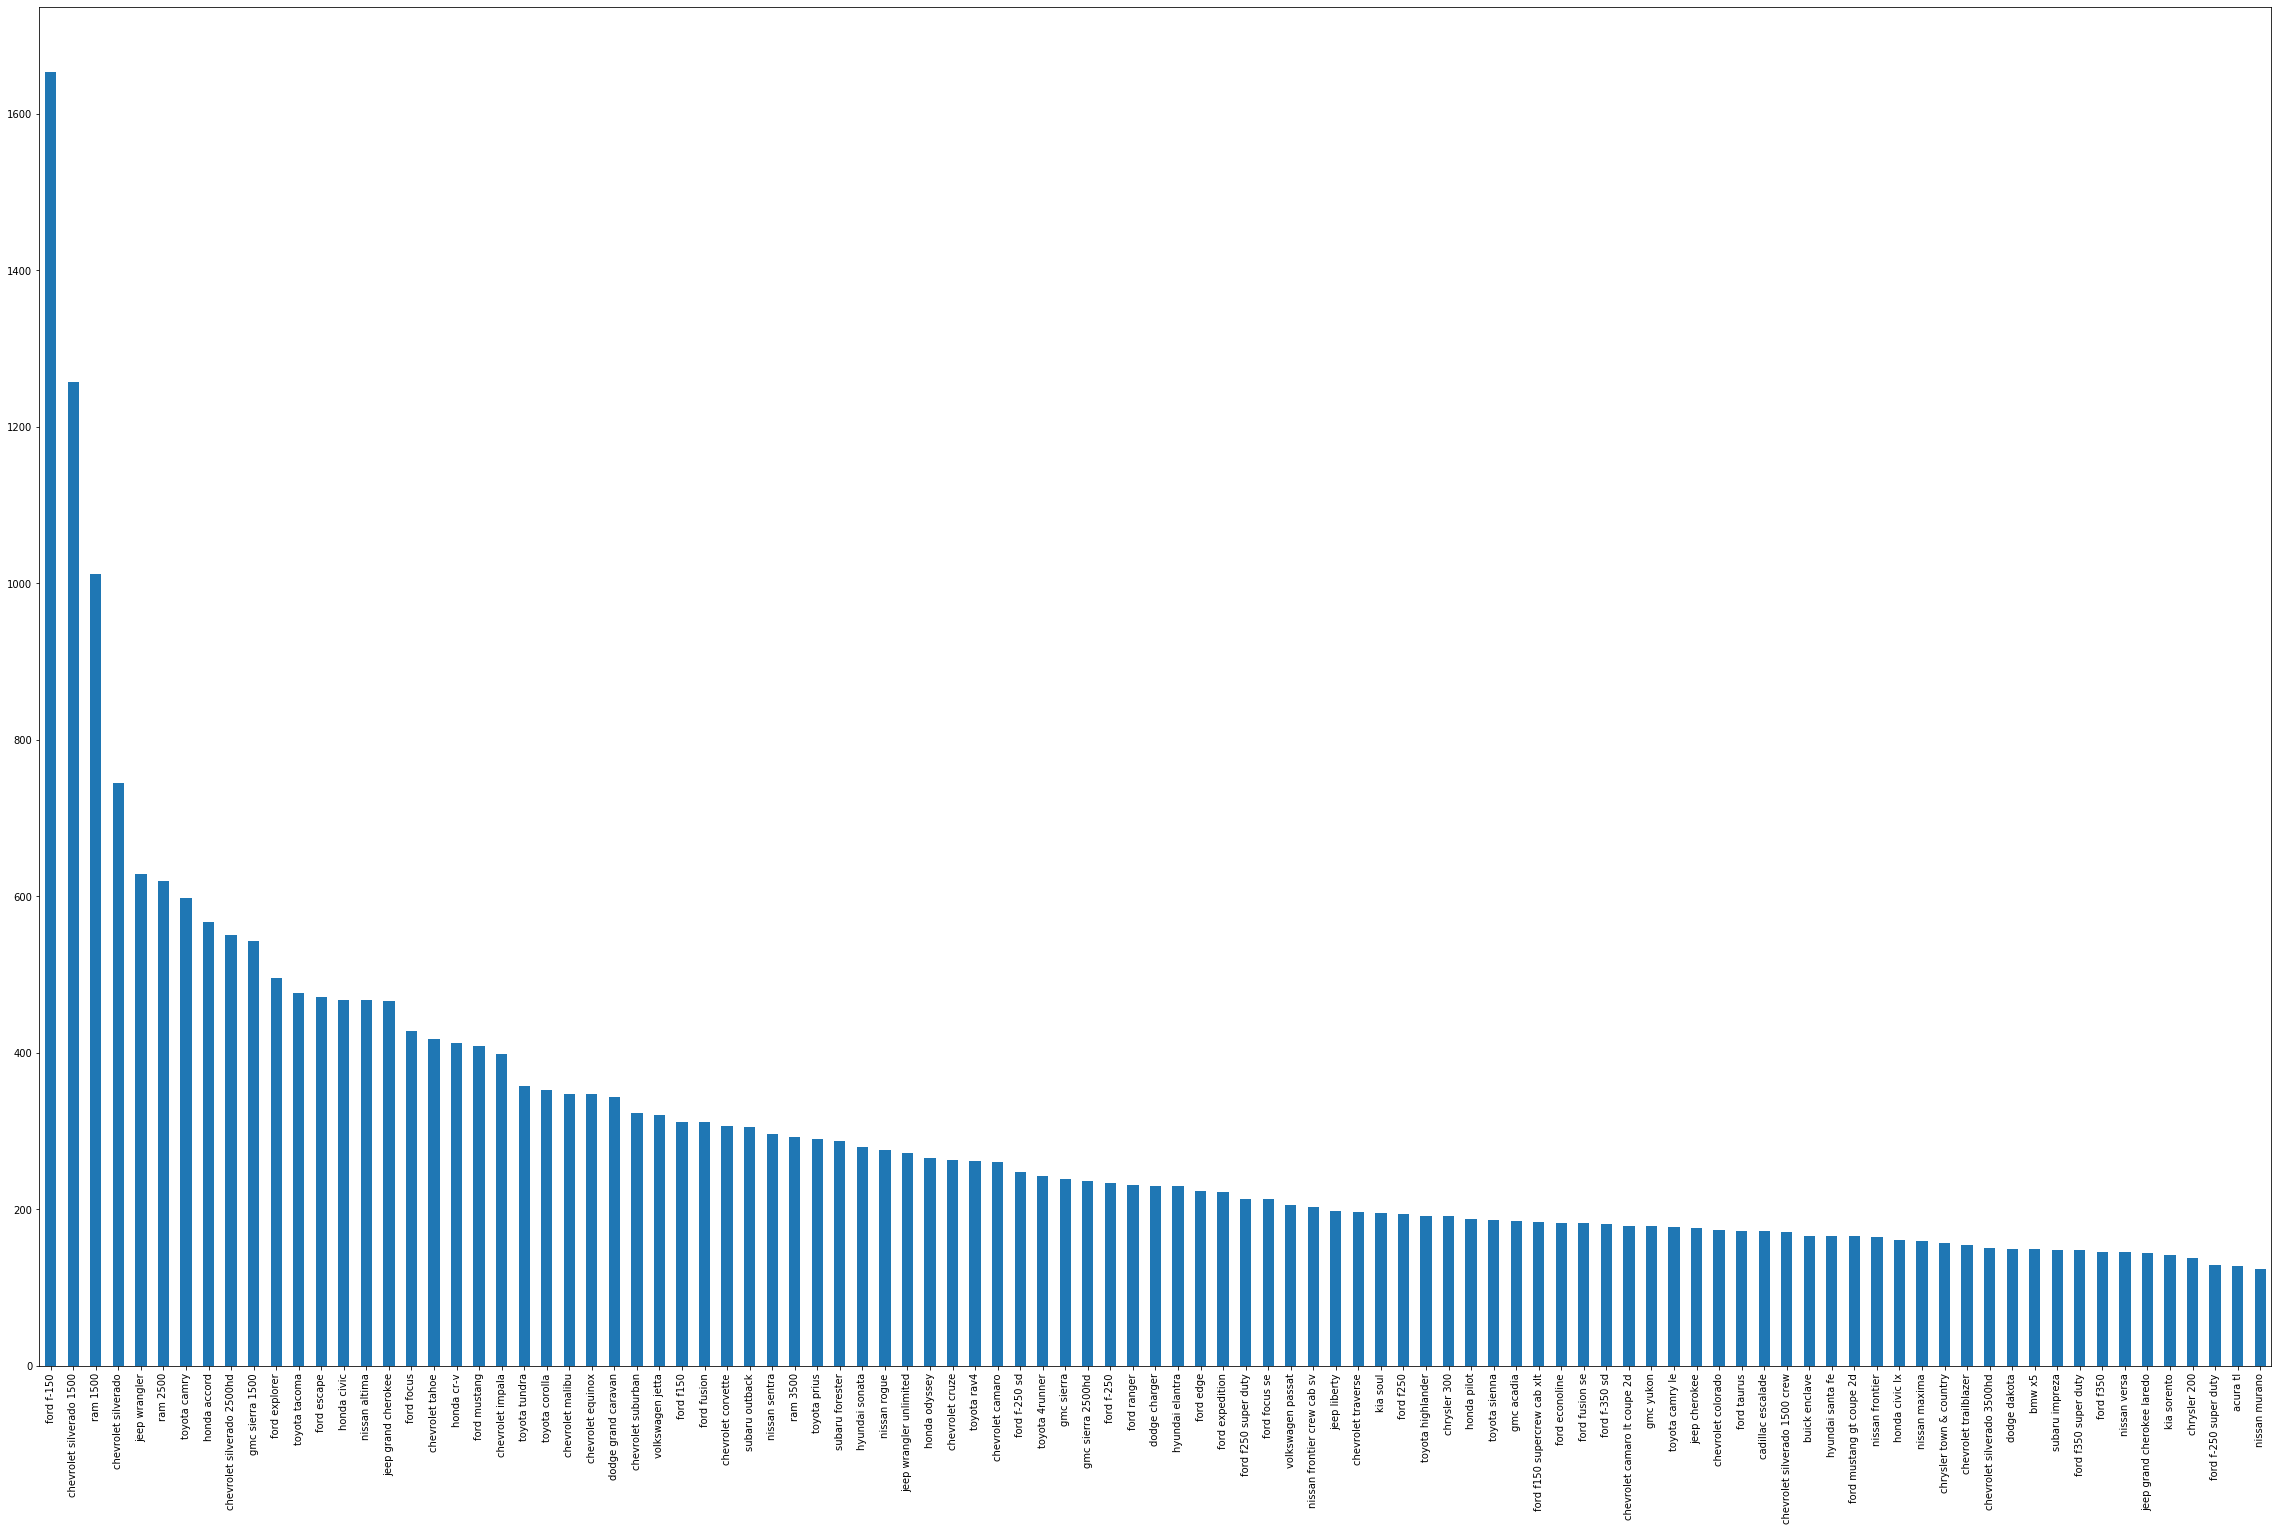

In [35]:
data['model'].value_counts().plot(kind='bar',figsize= (40,25))

In [36]:

data.groupby('model')['price'].mean()

model
acura tl              6518.054688
bmw x5               10958.825503
buick enclave        11644.548193
cadillac escalade    17990.034884
chevrolet camaro     13165.238462
                         ...     
toyota sienna         9125.580645
toyota tacoma        15543.182773
toyota tundra        14558.574230
volkswagen jetta      6467.345794
volkswagen passat     8191.932039
Name: price, Length: 99, dtype: float64

The two types with the greatest number of ads is : Ford f-150, Chevrolet silverado 1500.

## Price factors

-----------ford f-150-------------
contition corre
0.25323335147338455
--------------------------
car_age corre
-0.5173649158757769
--------------------------
odometer corre
-0.397221193218603


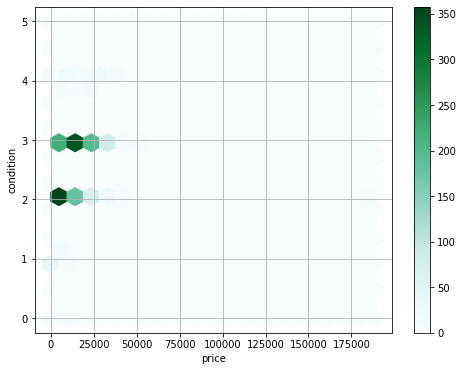

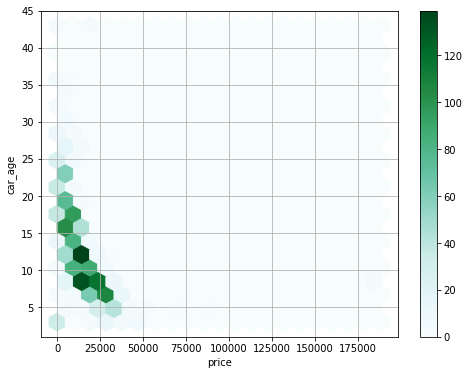

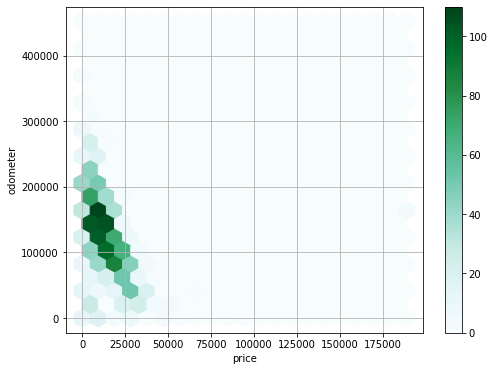

In [37]:
ford_150 = data.query('model == "ford f-150" ')
print('-----------ford f-150-------------')
print('contition corre')
print(ford_150['price'].corr(ford_150['condition']));
ford_150.plot(x='price', y='condition', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True);
print('--------------------------')
print('car_age corre')
print(ford_150['price'].corr(ford_150['car_age']));
ford_150.plot(x='price', y='car_age', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
print('--------------------------')
print('odometer corre')
print(ford_150['price'].corr(ford_150['odometer']))
ford_150.plot(x='price', y='odometer', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True);


In the first table we can see that the newer the vehicle's condition, the higher its price. It can also be seen that most of the vehicles are in 3 mode.

In the second table we can see that the younger the vehicle, the higher its price. 

From the third table it can be understood that the higher the mileage in the vehicle, the lower its price.

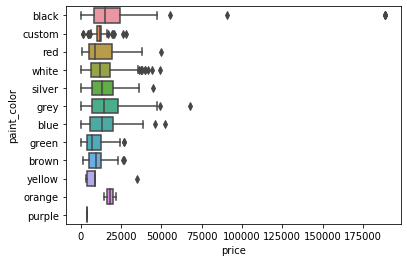

In [38]:
ax=sns.boxplot(x = 'price', y = 'paint_color', data = ford_150)

In the graph we can see that most of the colors are on the same price range. However the range of colors yellow, orange and purple is very small and relatively cheap for others, which teaches us about less demand for these colors.

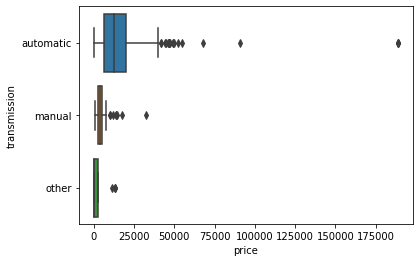

In [39]:

ax=sns.boxplot(x = 'price', y = 'transmission', data = ford_150)


We can see in the graph that the automatic transmission is much more expensive And requested than the manual and the others.

-----------chevrolet silverado 1500-------------
contition corre
0.34758688309669694
--------------------------
car_age corre
-0.7259582551063433
--------------------------
odometer corre
-0.6634652651648527


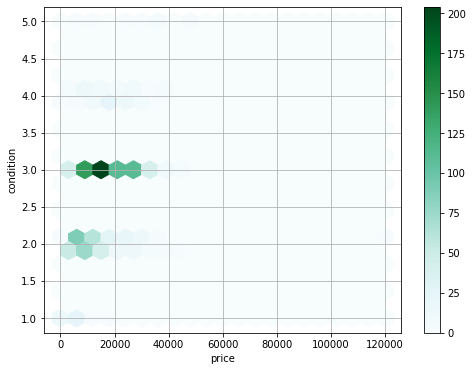

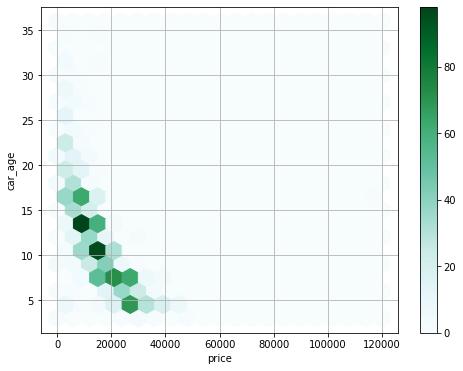

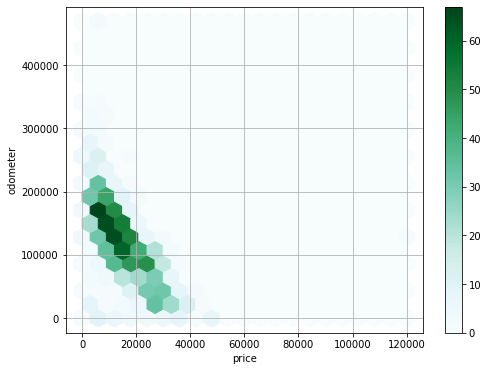

In [40]:
chevrolet = data.query('model == "chevrolet silverado 1500" ')
print('-----------chevrolet silverado 1500-------------')
print('contition corre')
print(chevrolet['price'].corr(chevrolet['condition']))
chevrolet.plot(x='price', y='condition', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
print('--------------------------')
print('car_age corre')
print(chevrolet['price'].corr(chevrolet['car_age']))
chevrolet.plot(x='price', y='car_age', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
print('--------------------------')
print('odometer corre')
print(chevrolet['price'].corr(chevrolet['odometer']))
chevrolet.plot(x='price', y='odometer', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True);

In the first table we can see that the newer the vehicle's condition, the higher its price. It can also be seen that most of the vehicles are in 3 mode.

In the second table we can see that the younger the vehicle, the higher its price.

From the third table it can be understood that the higher the mileage in the vehicle, the lower its price.

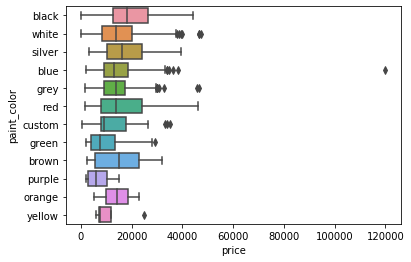

In [41]:
ax=sns.boxplot(x = 'price', y = 'paint_color', data = chevrolet)

In the graph we can see that most of the colors are on the same price range. However it can be seen that the cheaper colors and The least sought after are green, purple and yellow and the more expensive and more sought after colors are red, brown and black.

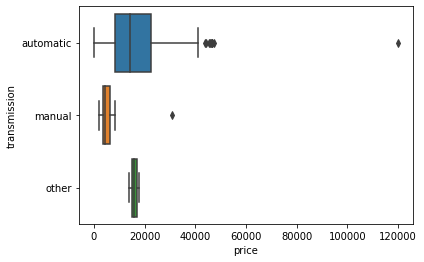

In [42]:
ax=sns.boxplot(x = 'price', y = 'transmission', data = chevrolet)

We can see in the graph that the automatic transmission is much more expensive And requested than the manual and the others.

Conclusions from this stage:

1.In both Ford and Chevrolet the parameter that affects the price the most is the age of the vehicle.

2.In Chevrolet it seems that the type of gearbox is very influential (when the automatic is more expensive) and so is the mileage.

3.Ford no longer saw parameters with a significant price correlation.

Final conclusion and steps in the project:

1.Preparing the data - I searched for missing entries and found most of them from the 'is_4wd' column (probably many of these did not have a 4X4 in the vehicle so they did not fill in this detail). I replaced these missing values with 0 (the number indicating that they do not have a 4X4) and deleted the other missing values.

2.I changed the 'model_year' column to integers.

3.Enrich data:
-I changed the 'date_posted' format and added a column for the day of the week in which the post was published.
-I added a column of the average mileage of the car per year.
-I changed the strings in the 'condition' column to numeric values to make it more convenient to work with. 

4.I made sure the data was clean.

5.I searched and determined exceptions in the data by setting upper and lower limits. I then created a new data set without exceptions.I compared the two data sets and found that the exceptions greatly affected the quality of the graph so I continued to work with the filtered data.

6.I checked the average lifespan of an ad. After finding and removing exceptions I found that the average lifespan of an ad is: 33 days, an ad that was removed too quickly was removed that day and an ad that was unusually long-lasting lasted 104 days.

7.I searched for the types of vehicles with the largest number of ads and found them: Ford 150 and Chevrolet Silverado.

8.I searched for the parameters that most affect the price (I checked which parameters have the most correlation with the price column) and found:
-In both Ford and Chevrolet the parameter that affects the price the most is the age of the vehicle. -In Chevrolet it seems that the type of gearbox is very influential (when the automatic is more expensive) and so is the mileage. 
-Ford no longer saw parameters with a significant price correlation.